In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [11]:
mask = pd.read_csv(r'C:\Users\Administrator\Desktop\mask.csv',encoding="gbk") 
mask.head()

,名称,价格,月销量,评价数,店铺所在地,适合肤质,产地,补水保湿,美白提亮,控油祛痘,清洁毛孔,提拉紧致
0,ANGLEE,254.0,40,3133,湖南,任何肤质,中国,1,1,0,0,0
1,ANGLEE,350.0,62,876,浙江,任何肤质,中国,1,1,0,0,0
2,ANGLEE,284.9,12,16,浙江,任何肤质,中国,1,0,1,1,0
3,BF,289.0,32,175,英国,任何肤质,中国,1,0,0,0,0
4,BSR,379.9,1407,13870,安徽,任何肤质,中国,1,0,0,0,0


In [12]:
print(mask['产地'].unique())
print(mask['店铺所在地'].unique())
print(mask['适合肤质'].unique())

['中国' '日本' '韩国' '美国' '英国' '其他/other']
['湖南' '浙江' '英国' '安徽' '广东' '湖北' '江苏' '上海' '江西' '北京' '海外' '天津' '山东' '河南'
 '新加坡' '河北' '辽宁' '四川' '重庆' '福建' '内蒙古' '海南' '云南' '广西' '陕西' '黑龙江']
['任何肤质' '干性肤质' '油性及混合性肤质' '中性及干性肤质' '混合型肤质' '敏感性肤质' '中性肤质' '油性肤质']


In [14]:
mask.loc[mask.店铺所在地 == '英国','店铺所在地']= '海外'
mask.loc[mask.店铺所在地 == '新加坡','店铺所在地'] = '海外'
print(mask['店铺所在地'].unique())

['湖南' '浙江' '海外' '安徽' '广东' '湖北' '江苏' '上海' '江西' '北京' '天津' '山东' '河南' '河北'
 '辽宁' '四川' '重庆' '福建' '内蒙古' '海南' '云南' '广西' '陕西' '黑龙江']


In [15]:
mask.loc[mask.产地 == '其他/other','产地'] = '其他'
mask.loc[mask.适合肤质 != '任何肤质','适合肤质'] = '其他'

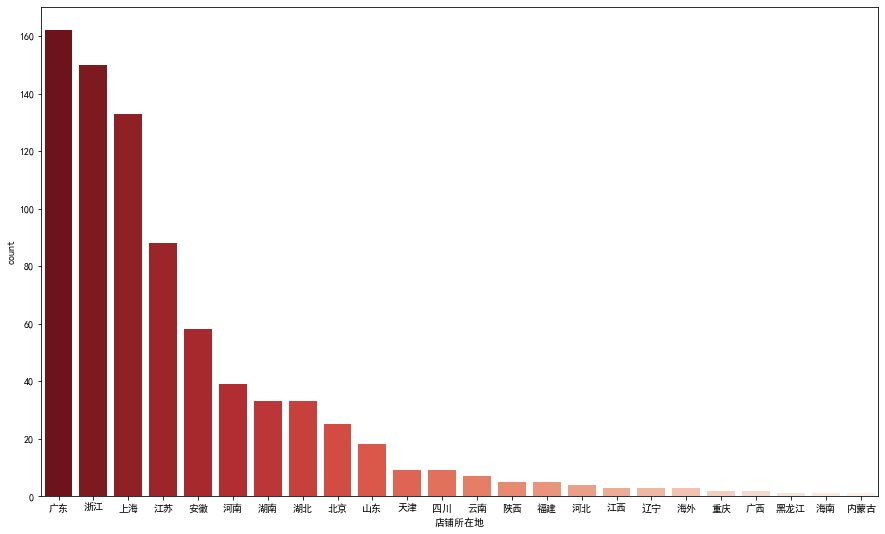

In [18]:
plt.figure(figsize=(15,9))
sns.countplot('店铺所在地',data=mask,order = mask['店铺所在地'].value_counts().index,palette='Reds_r')

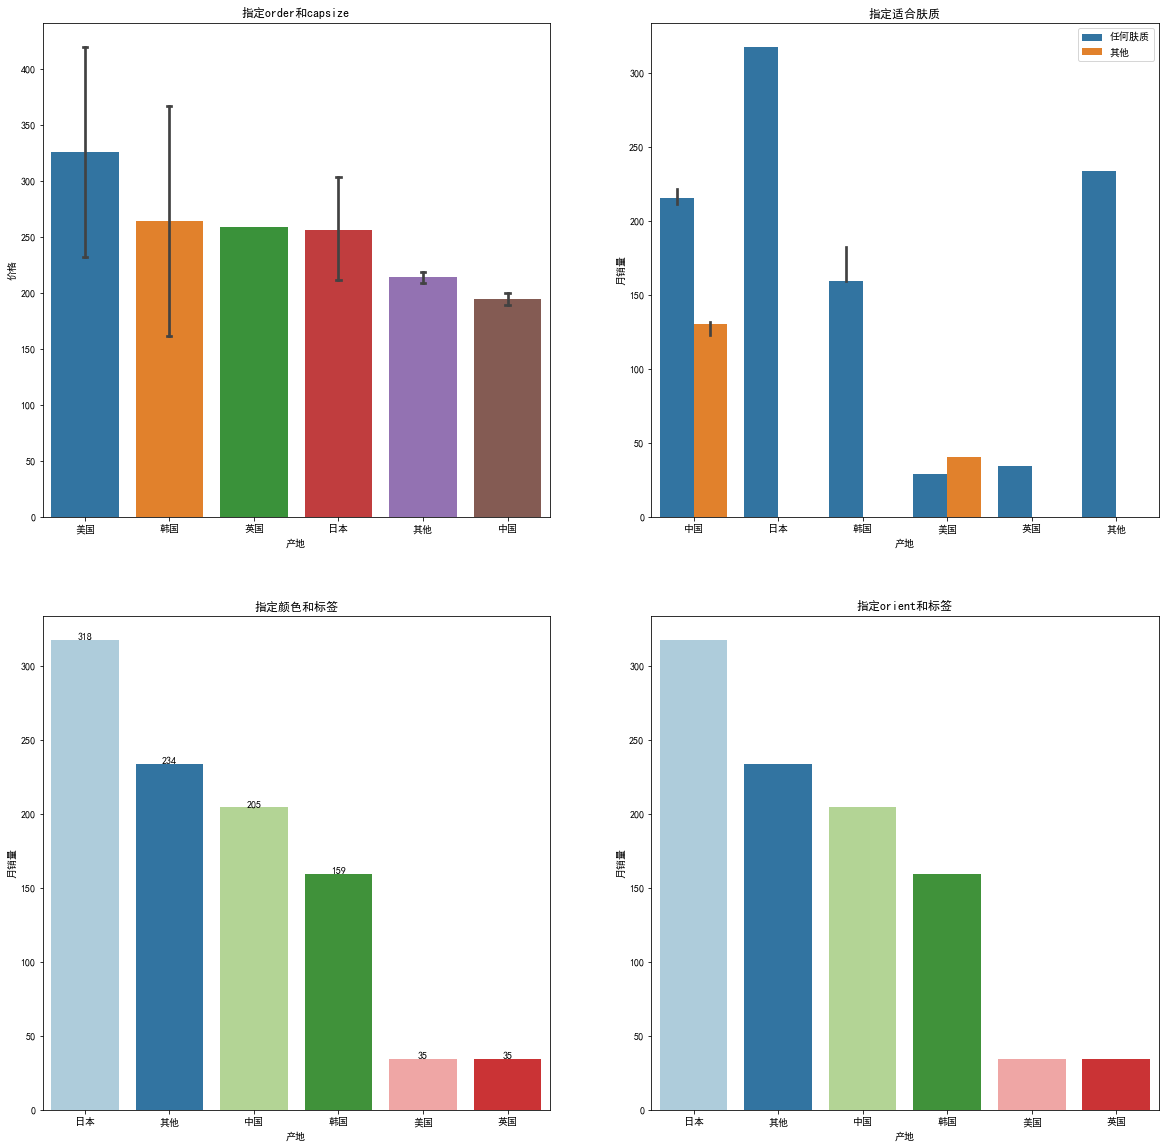

In [42]:
from numpy import median

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(2,2,1)
sns.barplot(x="产地", y="价格",data=mask, estimator=mean,ci=75,order=['美国', '韩国','英国','日本', '其他','中国'],capsize = 0.05) 
plt.title('指定order和capsize')

ax=fig.add_subplot(2,2,2)
sns.barplot(x="产地", y="月销量",hue="适合肤质", data=mask, estimator=median,ci=20)
plt.title('指定适合肤质')
plt.legend(loc='upper right')

ax=fig.add_subplot(2,2,3)
bardata = mask[['产地','月销量']].groupby(['产地']).median().sort_values(by='月销量',ascending = False).reset_index()
g = sns.barplot(x="产地", y="月销量",data=bardata, palette="Paired")
for index,row in bardata.iterrows():
    g.text(row.name,row.月销量,int(row.月销量),color="black",ha="center")
plt.title('指定颜色和标签')

ax=fig.add_subplot(2,2,4)
sns.barplot(x="产地", y="月销量",data=bardata, palette="Paired")

plt.title('指定orient和标签')##注意改变x和y

plt.show()

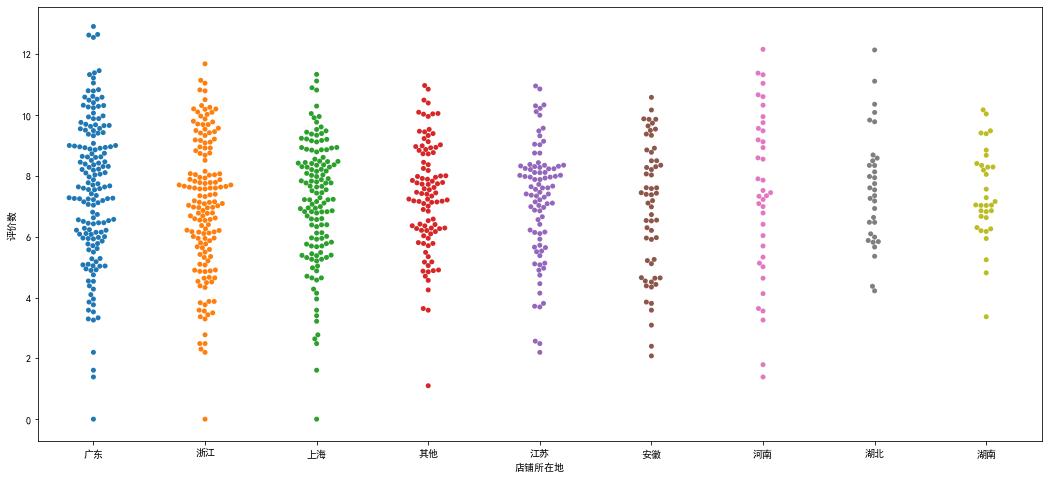